# Codigo para calcular $n_R, n_I$ del indice de refraccion

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad
from scipy import optimize

### Declaramos los parametros para calcular $n_R, n_I$

In [8]:
N = 1e28
q = 1.602e-19
m = 9.11e-31
e0 = 8.85e-12
gamma = 1e14
omega2 = 1e16

### Resolvemos simultaneamente

In [9]:
eq1 = lambda x: ((N*q**2)/(m*e0))*((x*gamma)/((omega2**2-x**2)**2+(x*gamma)**2))
eq2 = lambda x: ((N*q**2)/(m*e0))*((omega2**2-x**2)/((omega2**2-x**2)**2+(x*gamma)**2))
omegas = np.logspace(14, 18,300)
nrs = []
nis = []

for omega in omegas:
    coeff = [1,0,1+eq2(omega), 0, -eq1 (omega) **2/4]
    sols = np.roots(coeff)
    for sol in sols:
        if ((sol.imag==0) and sol.real >= 0):
            ni = sol. real
    nr = eq1(omega)/(2*ni)
    nrs.append(nr)
    nis.append(ni)


### Graficamos $n_R, n_I$

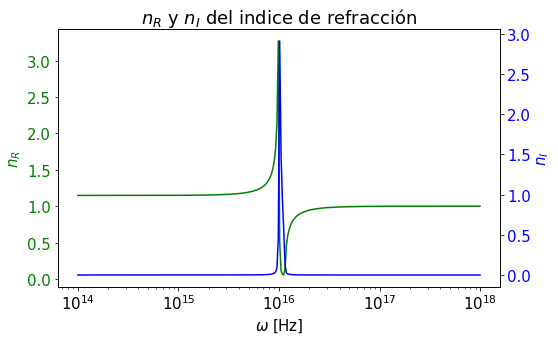

In [15]:
plt.rcParams ["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size':15})
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$\omega$ [Hz]')
ax1.set_ylabel(r'$n_R$', color='green')
ax1.set_xscale('log')
ax1.plot(omegas, nrs, color='green')
ax1.tick_params(axis = 'y', labelcolor='green')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel(r'$n_I$', color='blue')
ax2.plot(omegas, nis, color='blue')
ax2.tick_params (axis='y', labelcolor='blue')
ax2.set_title('$n_R$ y $n_I$ del indice de refracción')
fig. tight_layout()
plt.show()